In [ ]:
import pandas as pd
import numpy as np
import re
import os
import warnings
import spacy
import tensorflow as tf
from transformers import BertTokenizer, TFBertForSequenceClassification
from transformers import InputExample, InputFeatures
from transformers import BertConfig
from sklearn.model_selection import train_test_split
from transformers import TFBertForSequenceClassification, BertTokenizer
import string

In [61]:
nlp=spacy.load('en_core_web_sm')

In [63]:
#importing the training data
df=pd.read_csv('/kaggle/input/imdb-dataset-of-50k-movie-reviews/IMDB Dataset.csv')
print(df.shape)
df.head(10)

(50000, 2)


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
5,"Probably my all-time favorite movie, a story o...",positive
6,I sure would like to see a resurrection of a u...,positive
7,"This show was an amazing, fresh & innovative i...",negative
8,Encouraged by the positive comments about this...,negative
9,If you like original gut wrenching laughter yo...,positive


In [64]:
print(df['review'][12])

So im not a big fan of Boll's work but then again not many are. I enjoyed his movie Postal (maybe im the only one). Boll apparently bought the rights to use Far Cry long ago even before the game itself was even finsished. <br /><br />People who have enjoyed killing mercs and infiltrating secret research labs located on a tropical island should be warned, that this is not Far Cry... This is something Mr Boll have schemed together along with his legion of schmucks.. Feeling loneley on the set Mr Boll invites three of his countrymen to play with. These players go by the names of Til Schweiger, Udo Kier and Ralf Moeller.<br /><br />Three names that actually have made them selfs pretty big in the movie biz. So the tale goes like this, Jack Carver played by Til Schweiger (yes Carver is German all hail the bratwurst eating dudes!!) However I find that Tils acting in this movie is pretty badass.. People have complained about how he's not really staying true to the whole Carver agenda but we on

In [65]:
punctuations = string.punctuation

In [66]:
def clean_text(text):   
    text="".join(character for character in text if character not in punctuations)
    text=text.lower()
    text=re.sub('<br />','',text)
    text=re.sub("[,.*!%\n)()/']",'',text)     
    text=re.sub('-',' ',text)  
    return text

In [67]:
df['clean_text']=df['review'].apply(clean_text)
print(df['clean_text'][12])

so im not a big fan of bolls work but then again not many are i enjoyed his movie postal maybe im the only one boll apparently bought the rights to use far cry long ago even before the game itself was even finsished br br people who have enjoyed killing mercs and infiltrating secret research labs located on a tropical island should be warned that this is not far cry this is something mr boll have schemed together along with his legion of schmucks feeling loneley on the set mr boll invites three of his countrymen to play with these players go by the names of til schweiger udo kier and ralf moellerbr br three names that actually have made them selfs pretty big in the movie biz so the tale goes like this jack carver played by til schweiger yes carver is german all hail the bratwurst eating dudes however i find that tils acting in this movie is pretty badass people have complained about how hes not really staying true to the whole carver agenda but we only saw carver in a first person pers

In [68]:
sw=nlp.Defaults.stop_words
def remove_stop_words(text):
    text=text.split()
    l=[token for token in text if(token not in sw) ]
    return " ".join(l)

In [69]:
df['clean_text']=df['clean_text'].apply(remove_stop_words)
df['clean_text'][12]

'im big fan bolls work enjoyed movie postal maybe im boll apparently bought rights use far cry long ago game finsished br br people enjoyed killing mercs infiltrating secret research labs located tropical island warned far cry mr boll schemed legion schmucks feeling loneley set mr boll invites countrymen play players names til schweiger udo kier ralf moellerbr br names actually selfs pretty big movie biz tale goes like jack carver played til schweiger yes carver german hail bratwurst eating dudes find tils acting movie pretty badass people complained hes staying true carver agenda saw carver person perspective dont know looked like kicking br br storyline film demented evil mad scientist dr krieger played udo kier making geneticallymutatedsoldiers gms called performing topsecret research island reminds spoiler vancouver reason thats right palm trees instead got nice rich lumberjackwoods havent gone far started cry mehehe wanna stay true bolls shenanigans movie disappointed delivers tru

In [70]:
def lemmatize(text):
    doc=nlp(text)
    l=[i.lemma_ for i in doc]
    return " ".join(l)

In [ ]:
df['lemmatized_text']=df['clean_text'].apply(lemmatize)

In [ ]:
df['lemmatized_text'][12]

In [62]:
df=pd.read_csv("/kaggle/input/imdb-preprocessed/preprocessed_df.csv")
df.head()

,Unnamed: 0,review,sentiment,clean_text,lemmatized_text
0,0,One of the other reviewers has mentioned that ...,positive,reviewers mentioned watching 1 oz episode youl...,reviewer mention watch 1 oz episode you ll hoo...
1,1,A wonderful little production. <br /><br />The...,positive,wonderful little production br br filming tech...,wonderful little production br br film techniq...
2,2,I thought this was a wonderful way to spend ti...,positive,thought wonderful way spend time hot summer we...,think wonderful way spend time hot summer week...
3,3,Basically there's a family where a little boy ...,negative,basically theres family little boy jake thinks...,basically there s family little boy jake think...
4,4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,petter matteis love time money visually stunni...,petter matteis love time money visually stunni...


In [63]:
df['review']=df['lemmatized_text']
df.drop(columns=['lemmatized_text','clean_text','Unnamed: 0'])

,review,sentiment
0,reviewer mention watch 1 oz episode you ll hoo...,positive
1,wonderful little production br br film techniq...,positive
2,think wonderful way spend time hot summer week...,positive
3,basically there s family little boy jake think...,negative
4,petter matteis love time money visually stunni...,positive
...,...,...
49995,think movie right good job be not creative ori...,positive
49996,bad plot bad dialogue bad act idiotic direct a...,negative
49997,catholic teach parochial elementary school nun...,negative
49998,I m go disagree previous comment maltin second...,negative


In [64]:
text=df['review'].values
labels=df['sentiment'].values

In [65]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
labels = le.fit_transform(labels)

In [66]:
from sklearn.model_selection import train_test_split
x_train,x_val,y_train,y_val=train_test_split(text, labels,stratify=labels, test_size=0.2, random_state=0,shuffle=True)

In [67]:
print('x_train:',x_train.shape,'y_train:',y_train.shape)
print('x_val:',x_val.shape,'y_val:',y_val.shape)

x_train: (40000,) y_train: (40000,)
x_val: (10000,) y_val: (10000,)


# **Tf-Idf based Feature Extraction**

In [68]:
from sklearn.feature_extraction.text import TfidfVectorizer
word_vectorizer = TfidfVectorizer(max_features=512)
word_vectorizer.fit(x_train)

TfidfVectorizer(max_features=512)

In [69]:
train_word_features = word_vectorizer.transform(x_train)
val_word_features = word_vectorizer.transform(x_val)

In [70]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

lr_model=LogisticRegression().fit(train_word_features,y_train)
lr_model

LogisticRegression()

In [71]:
train_pred_lr=lr_model.predict(train_word_features)
print("F1-score on Train Set:",f1_score(y_train,train_pred_lr,average="weighted"))

F1-score on Train Set: 0.8461492983748834


In [75]:
val_pred_lr=lr_model.predict(val_word_features)
print("F1-score on Validation Set:",f1_score(y_val,val_pred_lr,average="weighted"))

F1-score on Validation Set: 0.8350886392563583


In [76]:
from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(y_val, val_pred_lr)
cm 

array([[4134,  866],
       [ 783, 4217]])

Text(0.5, 1.0, 'TfIdf-LR Confusion Matrix')

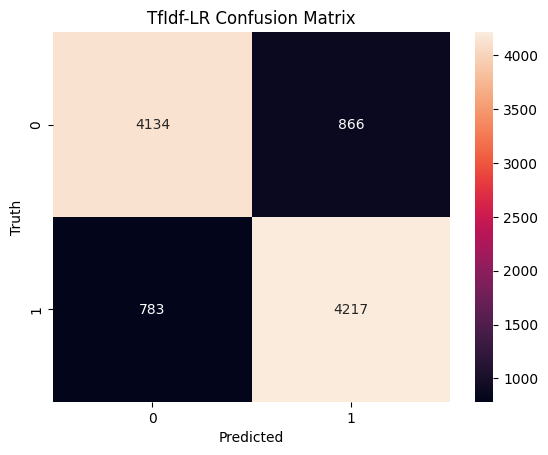

In [78]:
from matplotlib import pyplot as plt
import seaborn as sn
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title("TfIdf-LR Confusion Matrix")

# **Transformer based feature Extraction**

In [82]:
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text

In [83]:
bert_preprocess = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3")
bert_encoder = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4")

In [84]:
def get_encodings(text,i):
    emb=bert_preprocess(text)
    bert_out=bert_encoder(emb)['encoder_outputs'][-1][0]
    return bert_out

In [15]:
training_data=[]

In [ ]:
for i, x in enumerate(x_train[:20000]):
    enc=get_encodings([x], i)
    training_data.append(enc)

In [ ]:
training_data=np.array(training_data)

In [16]:
test_data=[]

In [ ]:
for i, x in enumerate(x_val[:4000]):
    enc=get_encodings([x], i)
    test_data.append(enc)

In [49]:
from tensorflow.keras.optimizers import Adam
custom_optimizer = Adam(learning_rate=0.0001)

In [50]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.layers import Flatten, BatchNormalization
from tensorflow.keras.regularizers import l2

model = Sequential()
model.add(LSTM(16, input_shape=(128, 768), activation='relu'))  
model.add(BatchNormalization())
model.add(Flatten())
model.add(Dense(16, activation='relu', kernel_regularizer=l2(0.005)))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))  

# Train your model
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_8 (LSTM)               (None, 16)                50240     
                                                                 
 batch_normalization_1 (Batc  (None, 16)               64        
 hNormalization)                                                 
                                                                 
 flatten_1 (Flatten)         (None, 16)                0         
                                                                 
 dense_16 (Dense)            (None, 16)                272       
                                                                 
 dropout_11 (Dropout)        (None, 16)                0         
                                                                 
 dense_17 (Dense)            (None, 1)                 17        
                                                      

In [51]:
model.compile(loss='binary_crossentropy', optimizer=custom_optimizer, metrics=['accuracy'])

In [52]:
history=model.fit(training_data, y_train[:20000],validation_data=(testing_data,y_val[:4000]), batch_size=64, epochs=25)

Epoch 1/25
313/313 [==============================] - 24s 72ms/step - loss: 0.7796 - accuracy: 0.5477 - val_loss: 0.7109 - val_accuracy: 0.6495
Epoch 2/25
313/313 [==============================] - 21s 67ms/step - loss: 0.6435 - accuracy: 0.6942 - val_loss: 0.5792 - val_accuracy: 0.7460
Epoch 3/25
313/313 [==============================] - 21s 66ms/step - loss: 0.5620 - accuracy: 0.7656 - val_loss: 0.5434 - val_accuracy: 0.7667
Epoch 4/25
313/313 [==============================] - 21s 67ms/step - loss: 0.5289 - accuracy: 0.7849 - val_loss: 0.5267 - val_accuracy: 0.7795
Epoch 5/25
313/313 [==============================] - 21s 67ms/step - loss: 0.5063 - accuracy: 0.7950 - val_loss: 0.4976 - val_accuracy: 0.7960
Epoch 6/25
313/313 [==============================] - 21s 67ms/step - loss: 0.4882 - accuracy: 0.8034 - val_loss: 0.4860 - val_accuracy: 0.8000
Epoch 7/25
313/313 [==============================] - 21s 66ms/step - loss: 0.4786 - accuracy: 0.8084 - val_loss: 0.4904 - val_accuracy:

In [53]:
import numpy as np

y_predicted = model.predict(testing_data)
y_predicted = y_predicted.flatten()
y_predicted = np.where(y_predicted > 0.5, 1, 0)
y_predicted

125/125 [==============================] - 3s 19ms/step


array([0, 1, 1, ..., 0, 1, 0])

In [54]:
from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(y_val[:4000], y_predicted)
cm 

array([[1652,  345],
       [ 368, 1635]])

Text(0.5, 1.0, 'BERT-LSTM Confusion Matrix on 4000 test samples')

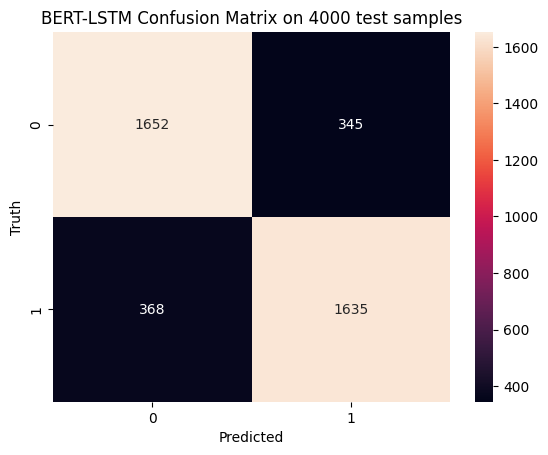

In [61]:
from matplotlib import pyplot as plt
import seaborn as sn
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title("BERT-LSTM Confusion Matrix on 4000 test samples")

Matplotlib is building the font cache; this may take a moment.


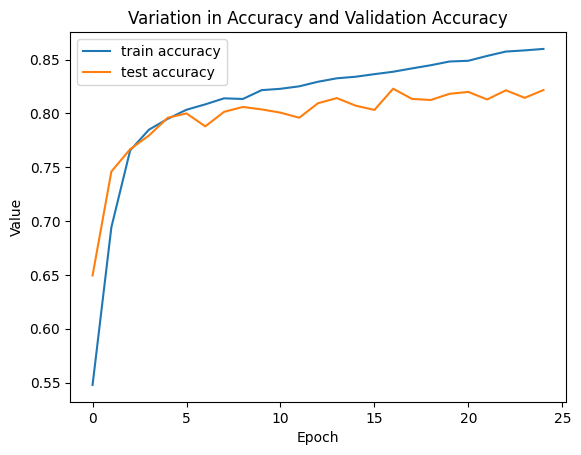

In [57]:
import matplotlib.pyplot as plt 

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Variation in Accuracy and Validation Accuracy')
plt.ylabel('Value')
plt.xlabel('Epoch')
plt.legend(['train accuracy', 'test accuracy'], loc=0)
plt.show()

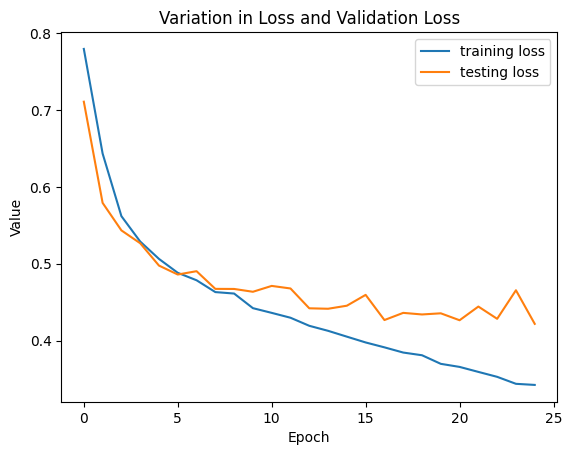

In [58]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Variation in Loss and Validation Loss')
plt.ylabel('Value')
plt.xlabel('Epoch')
plt.legend(['training loss', 'testing loss'], loc=0)
plt.show()

In [59]:
model.save('/kaggle/working/bert_model.h5')

In [24]:
from tensorflow.keras.preprocessing.text import Tokenizer  
from tensorflow.keras.preprocessing.sequence import pad_sequences  
from tensorflow.keras.layers import Embedding, LSTM, Dense 


In [25]:
def get_max_length():
    review_length = []
    for review in x_train:
        review_length.append(len(review))

    return int(np.ceil(np.mean(review_length)))

In [26]:
token = Tokenizer(lower=False)    
token.fit_on_texts(x_train)
x_train = token.texts_to_sequences(x_train)
x_val = token.texts_to_sequences(x_val)

max_length = get_max_length()

x_train = pad_sequences(x_train, maxlen=max_length, padding='post', truncating='post')
x_val = pad_sequences(x_val, maxlen=max_length, padding='post', truncating='post')

total_words = len(token.word_index) + 1   
print('Encoded X Train\n', x_train, '\n')
print('Encoded X Test\n', x_val, '\n')
print('Maximum review length: ', max_length)

Encoded X Train
 [[ 2795  7921 10256 ...     0     0     0]
 [    6     3    30 ...     0     0     0]
 [  695  1268  3008 ...     0     0     0]
 ...
 [ 1029  3553 33284 ...   273 36761   602]
 [   14     2    28 ...     0     0     0]
 [   88    90 23024 ...     0     0     0]] 

Encoded X Test
 [[ 406    2 9049 ...    0    0    0]
 [  26   87 2769 ...    4  124  164]
 [ 378    8  119 ...    0    0    0]
 ...
 [  62 1113 9097 ...    0    0    0]
 [5569  255 3716 ...  941  764    1]
 [  14    2 1175 ...    0    0    0]] 

Maximum review length:  111


In [45]:
model=[]

In [41]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.regularizers import l2

In [46]:
model = Sequential()
model.add(Embedding(total_words, 20, input_length = max_length))
model.add(BatchNormalization())
model.add(LSTM(32))
model.add(BatchNormalization())
model.add(Flatten())
model.add(Dense(32, activation='relu', kernel_regularizer=l2(0.005)))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))

print(model.summary())

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 111, 20)           2911960   
                                                                 
 batch_normalization_6 (Batc  (None, 111, 20)          80        
 hNormalization)                                                 
                                                                 
 lstm_3 (LSTM)               (None, 32)                6784      
                                                                 
 batch_normalization_7 (Batc  (None, 32)               128       
 hNormalization)                                                 
                                                                 
 flatten_3 (Flatten)         (None, 32)                0         
                                                                 
 dense_6 (Dense)             (None, 32)               

In [47]:
METRICS = [
      tf.keras.metrics.BinaryAccuracy(name='accuracy')
]

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=METRICS)

In [48]:
history=model.fit(x_train, y_train, validation_data=(x_val,y_val), batch_size = 64, epochs = 5)

Epoch 1/5
625/625 [==============================] - 36s 55ms/step - loss: 0.7230 - accuracy: 0.6309 - val_loss: 0.6388 - val_accuracy: 0.7669
Epoch 2/5
625/625 [==============================] - 34s 54ms/step - loss: 0.4441 - accuracy: 0.8406 - val_loss: 0.4321 - val_accuracy: 0.8342
Epoch 3/5
625/625 [==============================] - 33s 52ms/step - loss: 0.3247 - accuracy: 0.8818 - val_loss: 0.3716 - val_accuracy: 0.8481
Epoch 4/5
625/625 [==============================] - 33s 53ms/step - loss: 0.1989 - accuracy: 0.9318 - val_loss: 0.3920 - val_accuracy: 0.8497
Epoch 5/5
625/625 [==============================] - 33s 53ms/step - loss: 0.1274 - accuracy: 0.9597 - val_loss: 0.4574 - val_accuracy: 0.8476


In [51]:
import numpy as np

y_predicted = model.predict(x_val)
y_predicted = y_predicted.flatten()
y_predicted = np.where(y_predicted > 0.5, 1, 0)
y_predicted

313/313 [==============================] - 4s 13ms/step


array([0, 1, 1, ..., 0, 1, 0])

In [53]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

cm = confusion_matrix(y_val, y_predicted)
cm 

array([[4124,  876],
       [ 648, 4352]])

Text(0.5, 1.0, 'Embedding-LSTM Confusion Matrix')

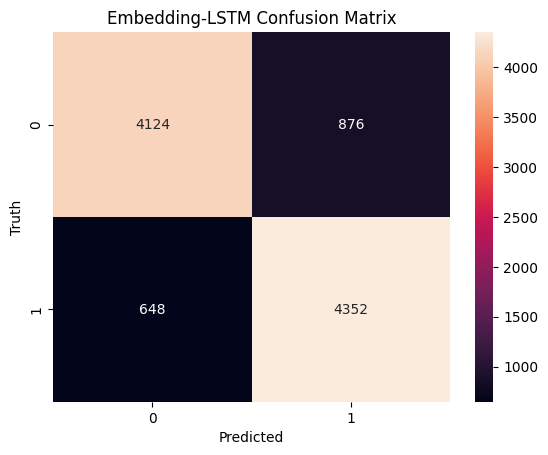

In [58]:
from matplotlib import pyplot as plt
import seaborn as sn
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title("Embedding-LSTM Confusion Matrix")

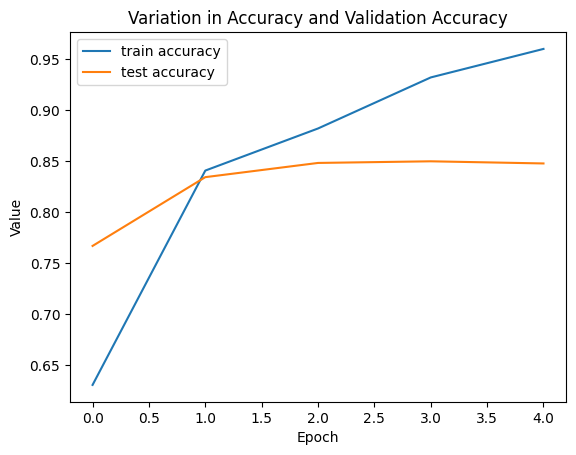

In [49]:
import matplotlib.pyplot as plt 

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Variation in Accuracy and Validation Accuracy')
plt.ylabel('Value')
plt.xlabel('Epoch')
plt.legend(['train accuracy', 'test accuracy'], loc=0)
plt.show()

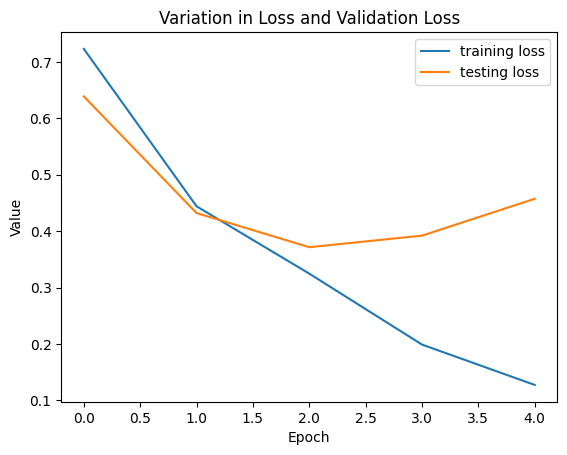

In [50]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Variation in Loss and Validation Loss')
plt.ylabel('Value')
plt.xlabel('Epoch')
plt.legend(['training loss', 'testing loss'], loc=0)
plt.show()